# Network Graphs Tutorial

Draft: 2021-09-30  
Based on Run4more Data architecture.  

Tutorial Goals:   
* introduce network graphs and `networkx` library,
* show use cases of network graphs in data visualization,
* provide simple examples of network graph plots,
* show basic network graph plots parameters,
* show how to create visually appealing and informative-readable network graphs.

Network graphs are used to represent relationships between entities.
Entities are plotted as *"nodes"* and relationships are typically shown as connecting lines which are called *"edges"*.

We use an abstraction of the Run4more data architecture. We assume that the data consist of three main entities: "users", "brands", and "features".   
Users are connected to the brands they have viewed and to a feature that may influence their behavior.  

We start with simple examples and gradually add complexity to the network graphs.
In the end, we aim to create a visually appealing and informative-readable network graph that also displays aggregate quantitative information.   

Specifically, we add four extra dimensions:  
* a) how much the users use the App, by adjusting the node size.  
* b) how much a users looks at a brand in the App, by adjusting the proximity to the brand.  
* c) the total number of views of each brand, by adjusting the node size of the brands
* d) the number of views of each user to each brand, by adjusting the thickness of the edges (the connecting lines).

This way, we achieve a 7D representation of the data on a 2D surface.

The plot should look like the template image below.  

<img src="users_brand_feature_network_simple.png" width="1500" height="1500" />


In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

## 1. Scenario 1: simple network graph, two types of nodes
Scenario 1:   
An App with four users that shows two brands to them.    
The data show which brand each user has viewed more times.

In [2]:
# scenario 1 data 
data_1 = {
    "user_id": ["u_1", "u_2", "u_3", "u_4"],
    "most_views_brand": ["brand_1", "brand_2", "brand_2", "brand_2"],
}

users_brands_network_df = pd.DataFrame(data_1)
users_brands_network_df

,user_id,most_views_brand
0,u_1,brand_1
1,u_2,brand_2
2,u_3,brand_2
3,u_4,brand_2


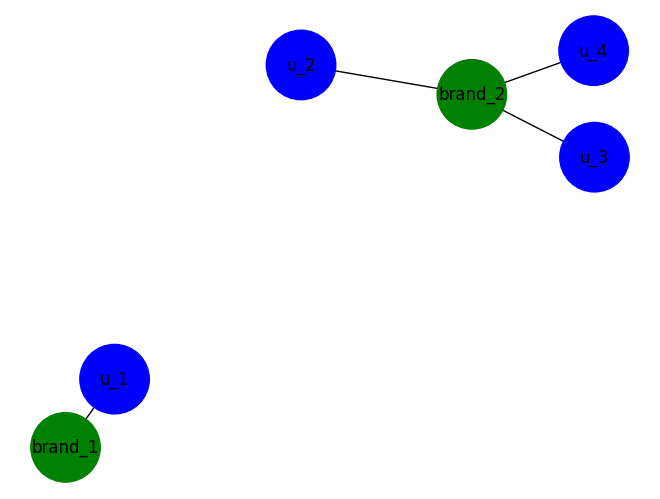

In [3]:
# Graph object
G_1 = nx.from_pandas_edgelist(
    users_brands_network_df, source='user_id', target='most_views_brand'
)

# Set different colors for users and brand nodes
node_colors = []
for node in G_1.nodes():
    if node.startswith('brand'):
        node_colors.append('green')
    else:
        node_colors.append('blue')

# Set seed
seed = 0
pos = nx.spring_layout(G_1, seed=seed)

#  Draw and show plot
nx.draw(G_1, pos=pos, with_labels=True, node_size=2500, node_color=node_colors)
plt.show()

## 2. Scenario 2: Simple network graph, three types of nodes
Scenario 2:   
An App with four users that shows two brands to them.       
The data show which brand each user has viewed more times.   
Addition:  
The users also have a characteristic feature that may influence their behaviour, e.g. age.        
Three of the users have feature value = 1 and one user has feature value = 2.

In [4]:
# scenario 2 data
data_2 = {
    "user_id": ["u_1", "u_2", "u_3", "u_4"],
    "most_views_brand": ["brand_1", "brand_2", "brand_2", "brand_2"],
    "feature": ["value_1", "value_2", "value_2", "value_2"],
}

users_brands_feature_network_df = pd.DataFrame(data_2)
users_brands_feature_network_df

,user_id,most_views_brand,feature
0,u_1,brand_1,value_1
1,u_2,brand_2,value_2
2,u_3,brand_2,value_2
3,u_4,brand_2,value_2


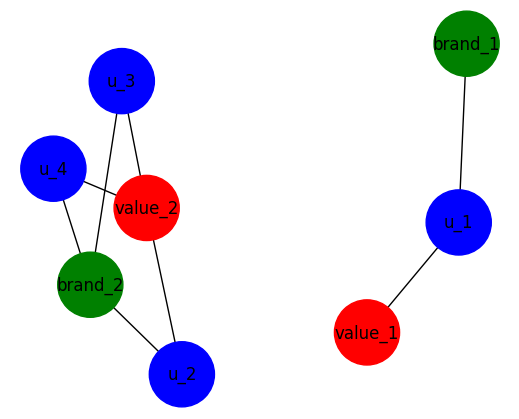

In [5]:
# Graph object
G_2 = nx.Graph()

# Add edges for most_views_brand and feature
for _, row in users_brands_feature_network_df.iterrows():
    G_2.add_edge(row['user_id'], row['most_views_brand'])
    G_2.add_edge(row['user_id'], row['feature'])

# Set different colors for users, brand, feature nodes
node_colors = []
for node in G_2.nodes():
    if node.startswith('brand'):
        node_colors.append('green')
    elif node.startswith('value'):
        node_colors.append('red')
    else:
        node_colors.append('blue')

# Set seed
seed = 4
# Adjust k to increase distance between nodes
pos = nx.spring_layout(G_2, seed=seed, k=0.99)
# Set figure size
plt.figure(figsize=(5, 4))  # width, height

# Draw plot
nx.draw(G_2, pos=pos, with_labels=True, node_size=2200, node_color=node_colors)
plt.show()

## 3. Scenario 3: Simple network graph, three types of nodes
Scenario 3:   
An App with four users that shows two brands to them.        
The users also have a characteristic feature that may influence their behaviour, e.g. age.        
Three of the users have feature value = 1 and one user has feature value = 2.   
Addition:   
The data show all brands that each user has viewed and not just his favorite brand. This means that each user node may connect to more than one brand nodes.   
To make it more realistic, we have three brands instead of two.   

### 3.1. Create a network graph with three types of nodes: users, brands, and features

In [6]:
# New column with a list of all the brands a user has viewed
# Scenario 3 data
data_3 = {
    "user_id": ["u_1", "u_2", "u_3", "u_4"],
    "feature": ["value_1", "value_2", "value_2", "value_2"],
    "brand_views": [
        ["brand_1"], ["brand_1", "brand_3"], ["brand_2", "brand_3"], ["brand_1", "brand_2", "brand_3"]
    ]
}

users_feature_brands_list_network_df = pd.DataFrame(data_3)
users_feature_brands_list_network_df

,user_id,feature,brand_views
0,u_1,value_1,[brand_1]
1,u_2,value_2,"[brand_1, brand_3]"
2,u_3,value_2,"[brand_2, brand_3]"
3,u_4,value_2,"[brand_1, brand_2, brand_3]"


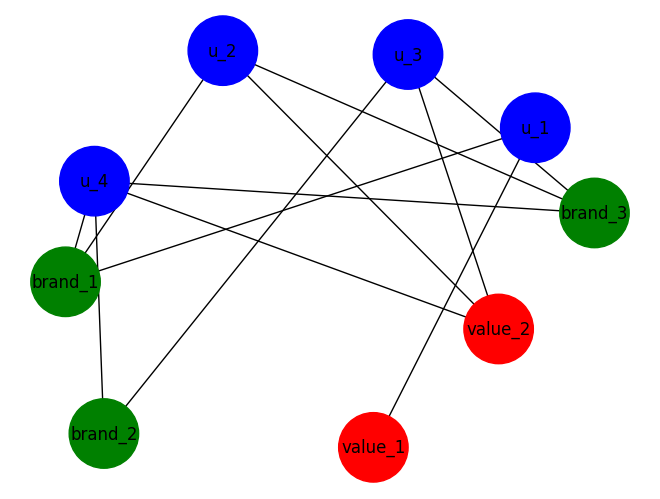

In [7]:
G_3 = nx.Graph()

# Add edges
for _, row in users_feature_brands_list_network_df.iterrows():
    for brand in row['brand_views']:
        G_3.add_edge(row['user_id'], row['feature'])
        G_3.add_edge(row['user_id'], brand)

# Assign colors using lambda. Nodes are more than columns in this DataFrame.
assign_color = lambda node: 'green' if node.startswith('brand') else (
    'red' if node.startswith('value') else 'blue'
)
# Generate node_colors list
node_colors = [assign_color(node) for node in G_3.nodes()]

# # seed 0 makes the graph look better in this case
seed = 0
pos = nx.spring_layout(G_3, seed=seed, k=3)

# Draw plot
nx.draw(G_3, pos=pos, with_labels=True, node_size=2500, node_color=node_colors)
plt.show()

### Configure node positions to create a visually appealing and informative-readable graph
Use the r4m layout `users_brand_feature_network_simple.png` as a reference.
### 3.2. Position feature values at the top
We start by simply adjusting the positions of the feature "values" nodes. 
We set feature "values" at the top of the plot and slightly offset them horizontally. 
The new code to focus is:  
```python
# Adjust "value" nodes positions to the top
offset = 0.4
value_nodes = [node for node in G_4.nodes() if node.startswith('value')]
for i, node in enumerate(value_nodes):
    pos[node] = [-0.5 + i * offset, 1]  # horizontal offset
```

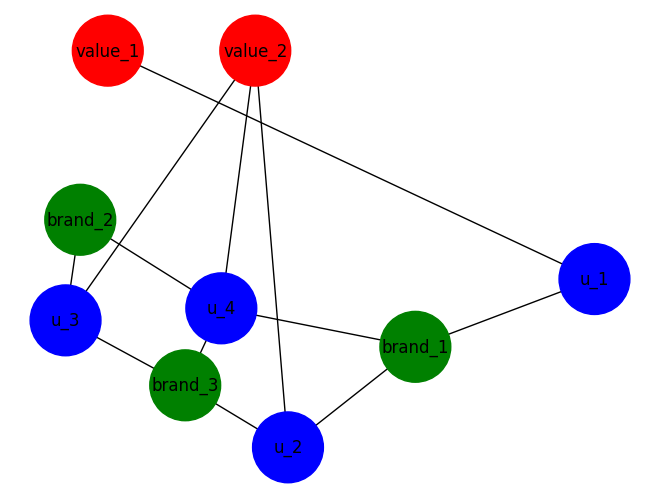

In [8]:
# seed 4 makes the graph look better in this case
seed = 4
pos = nx.spring_layout(G_3, seed=seed, k=0.9)

# Adjust "value" nodes positions to the top
offset = 0.4
value_nodes = [node for node in G_3.nodes() if node.startswith('value')]
for i, node in enumerate(value_nodes):
    pos[node] = [-0.5 + i * offset, 1]  # horizontal offset

# Draw plot
nx.draw(G_3, pos=pos, with_labels=True, node_size=2600, node_color=node_colors)
plt.show()

### 3.3. Adjust positions of "brand" nodes to the bottom of the plot
Similarly to the plot above we adjust the positions of the "brand" nodes.

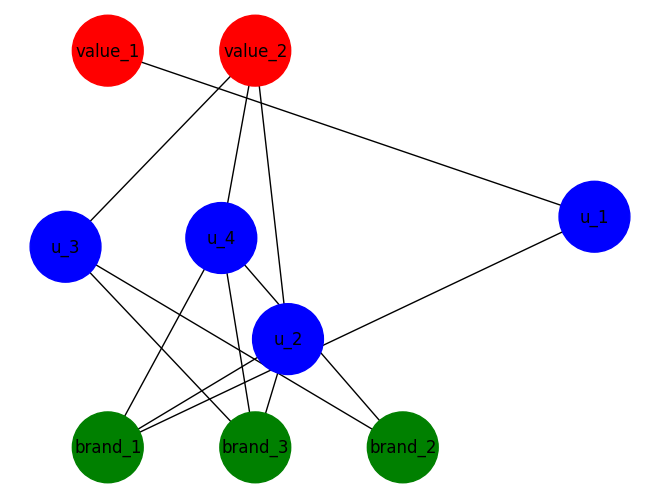

In [9]:
# Adjust positions of "brand" nodes to the bottom
brand_offset = 0.4
brand_nodes = [node for node in G_3.nodes() if node.startswith('brand')]
for i, node in enumerate(brand_nodes):
    pos[node] = [-0.5 + i * brand_offset, -1]  

# Draw plot
nx.draw(G_3, pos=pos, with_labels=True, node_size=2600, node_color=node_colors)
plt.show()

### 3.4. Adjust positions of "user" nodes to the middle and plot them in ascending order
Similarly to above but we also order the "user" nodes to be u_1, u_2, u_3.

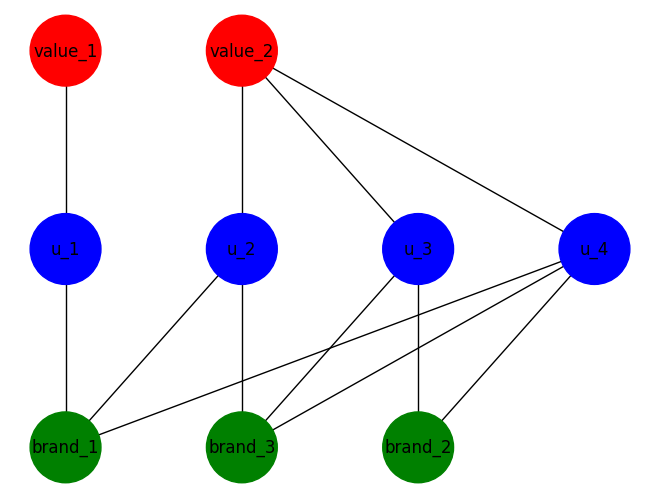

In [10]:
# Adjust "user" nodes to the middle of the plot, in order
user_offset = 0.4
user_nodes = ["u_1", "u_2", "u_3", "u_4"]
for i, node in enumerate(user_nodes):
    pos[node] = [-0.5 + i * user_offset, 0]

# Draw plot
nx.draw(G_3, pos=pos, with_labels=True, node_size=2600, node_color=node_colors)
plt.show()

## 4. Scenario 4: Add total "view counts" to represent the total number of views to all brands, and adjust user node size proportionally, based on the number of views

### 4.1. Adjust user node sizes based on the number of views

In [11]:
# Add total view counts to data
# Scenario 4 data
data_4 = {
    "user_id": ["u_1", "u_2", "u_3", "u_4"],
    "feature": ["value_1", "value_2", "value_2", "value_2"],
    "brand_views": [
        ["brand_1"], ["brand_1", "brand_3"], ["brand_2", "brand_3"], ["brand_1", "brand_2", "brand_3"]
    ],
    "view_counts": [80, 55, 20, 10]
}

users_feature_brands_list_views_df = pd.DataFrame(data_4)
users_feature_brands_list_views_df

,user_id,feature,brand_views,view_counts
0,u_1,value_1,[brand_1],80
1,u_2,value_2,"[brand_1, brand_3]",55
2,u_3,value_2,"[brand_2, brand_3]",20
3,u_4,value_2,"[brand_1, brand_2, brand_3]",10


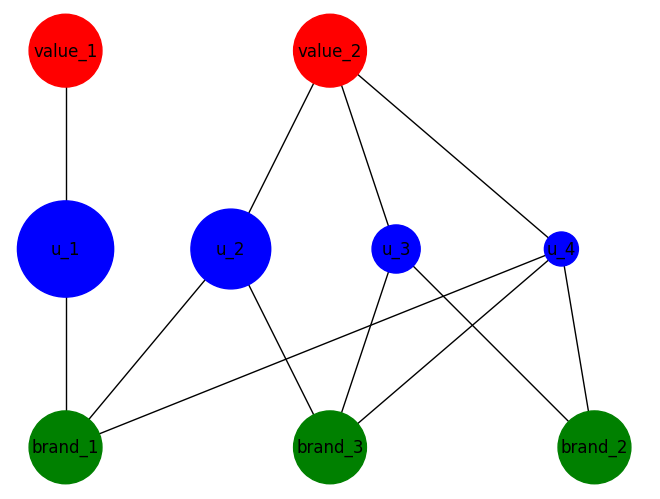

In [12]:
G_4 = nx.Graph()

for _, row in users_feature_brands_list_views_df.iterrows():
    for brand in row['brand_views']:
        G_4.add_edge(row['user_id'], row['feature'])
        G_4.add_edge(row['user_id'], brand)

# Assign colors
assign_color = lambda node: 'green' if node.startswith('brand') else (
    'red' if node.startswith('value') else 'blue'
)
node_colors = [assign_color(node) for node in G_4.nodes()]

# Set seed 
seed = 22
pos = nx.spring_layout(G_4, seed=seed)

# Adjust positions of "value" nodes to the top
value_offset = 0.4
value_nodes = [node for node in G_4.nodes() if node.startswith('value')]
for i, node in enumerate(value_nodes):
    pos[node] = [-0.5 + i * value_offset, 1]

# Adjust positions of "brand" nodes to the bottom
brand_offset = 0.4
brand_nodes = [node for node in G_4.nodes() if node.startswith('brand')]
for i, node in enumerate(brand_nodes):
    pos[node] = [-0.5 + i * brand_offset, -1]

# Adjust "user" nodes to the middle of the plot, in order
user_offset = 0.25
user_nodes = ["u_1", "u_2", "u_3", "u_4"]
for i, node in enumerate(user_nodes):
    pos[node] = [-0.5 + i * user_offset, 0]

# Map user_id to view_counts
view_counts_dict = dict(zip(data_4["user_id"], data_4["view_counts"]))

# Generate node_sizes list
node_sizes = [view_counts_dict[node] * 60 if node in view_counts_dict else 2750 for node in G_4.nodes()]

# Draw plot
nx.draw(G_4, pos=pos, with_labels=True, node_size=node_sizes, node_color=node_colors)
plt.show()

## 5. Scenario 5: Add "views_counts_by_brand" to represent the total number of views to each brand 

### 5.1 Adjust user proximity to brand based on number of views, by custom algorithm

In [13]:
# Add views counts by brand to data
# Scenario 5 data
data_5 = {
    "user_id": ["u_1", "u_2", "u_3", "u_4"],
    "feature": ["value_1", "value_2", "value_2", "value_2"],
    "brand_views": [
        ["brand_1"], ["brand_1", "brand_3"], ["brand_1", "brand_2", "brand_3"], ["brand_2", "brand_3"]
    ],
    "views_count_by_brand": [
        {"brand_1": 25}, {"brand_1": 28, "brand_3": 20}, {"brand_1": 10,"brand_2": 3, "brand_3": 6}, {"brand_2": 4, "brand_3": 8}
    ],
    "total_views": [25, 48, 19, 12]
}

users_feature_views_by_brand_df = pd.DataFrame(data_5)
users_feature_views_by_brand_df

,user_id,feature,brand_views,views_count_by_brand,total_views
0,u_1,value_1,[brand_1],{'brand_1': 25},25
1,u_2,value_2,"[brand_1, brand_3]","{'brand_1': 28, 'brand_3': 20}",48
2,u_3,value_2,"[brand_1, brand_2, brand_3]","{'brand_1': 10, 'brand_2': 3, 'brand_3': 6}",19
3,u_4,value_2,"[brand_2, brand_3]","{'brand_2': 4, 'brand_3': 8}",12


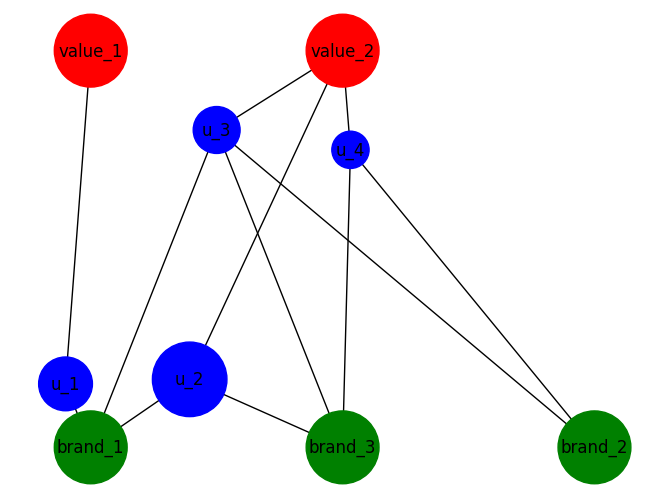

In [14]:
G_5 = nx.Graph()

for _, row in users_feature_views_by_brand_df.iterrows():
    for brand in row['brand_views']:
        G_5.add_edge(row['user_id'], row['feature'])
        G_5.add_edge(row['user_id'], brand)

# Assign colors
assign_color = lambda node: 'green' if node.startswith('brand') else ('red' if node.startswith('value') else 'blue')
node_colors = [assign_color(node) for node in G_5.nodes()]

# Set seed
seed = 22
pos = nx.spring_layout(G_5, seed=seed, k=1)

# Adjust positions of "value" nodes to the top
value_offset = 0.4
value_nodes = [node for node in G_5.nodes() if node.startswith('value')]
for i, node in enumerate(value_nodes):
    pos[node] = [-0.5 + i * value_offset, 1]

# Adjust positions of "brand" nodes to the bottom
brand_offset = 0.4
brand_nodes = [node for node in G_5.nodes() if node.startswith('brand')]
for i, node in enumerate(brand_nodes):
    pos[node] = [-0.5 + i * brand_offset, -1]

# Map user_id to view_counts
view_counts_dict = dict(zip(data_5["user_id"], data_5["total_views"]))

# Generate node_sizes list
node_sizes = [view_counts_dict[node] * 60 if node in view_counts_dict else 2750 for node in G_5.nodes()]

# Adjust positions of user nodes based on views_count_by_brand
for _, row in users_feature_views_by_brand_df.iterrows():
    user_id = row['user_id']
    brand_positions = [pos[brand] for brand in row['brand_views'] if brand in pos]
    if brand_positions:
        avg_brand_x = sum([bp[0] for bp in brand_positions]) / len(brand_positions)
        avg_brand_y = sum([bp[1] for bp in brand_positions]) / len(brand_positions)
        # total views for user
        total_views = sum(row['views_count_by_brand'].values())
        # average distance from brands, inversely proportional to views_count_by_brand
        avg_distance = sum([1 / views for views in row['views_count_by_brand'].values()]) / len(row['views_count_by_brand'])
        # increase Y distance to make the plot more readable
        pos[user_id] = [
            avg_brand_x - avg_distance, avg_brand_y + avg_distance * 8] 

# Draw plot
nx.draw(G_5, pos=pos, with_labels=True, node_size=node_sizes, node_color=node_colors)
plt.show()

#### Important Note:
The plot above servers as a demonstration of how to create a visually appealing and informative-readable network graph, and is not an exact representation of the data.    
That is because the brands nodes are positioned to the bottom no allowing for actual proximity to the user nodes.  
Removing the contraint that brand nodes are at the bottom would allow for a more accurate representation of the data.



### 5.2 Adjust user proximity to brand based on number of views, by using networkx layouts

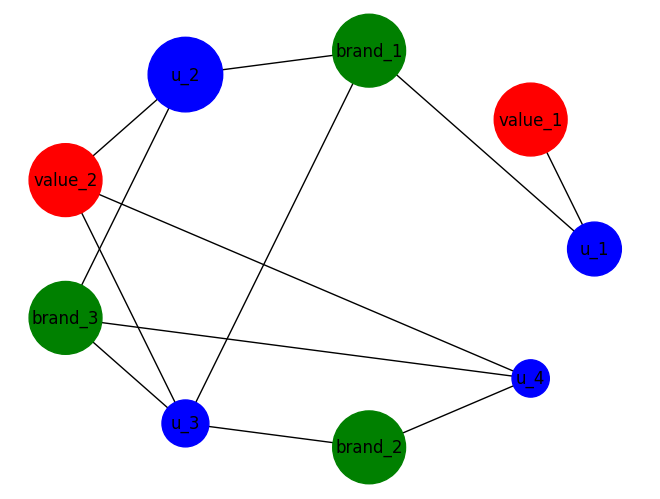

In [15]:
G_5 = nx.Graph()

for _, row in users_feature_views_by_brand_df.iterrows():
    for brand in row['brand_views']:
        G_5.add_edge(row['user_id'], row['feature'])
        G_5.add_edge(row['user_id'], brand)

# Assign colors
assign_color = lambda node: 'green' if node.startswith('brand') else ('red' if node.startswith('value') else 'blue')
node_colors = [assign_color(node) for node in G_5.nodes()]

# Use the circular layout (nodes are positioned on a circle)
pos = nx.circular_layout(G_5)

# Map user_id to view_counts
view_counts_dict = dict(zip(data_5["user_id"], data_5["total_views"]))

# Generate node_sizes list
node_sizes = [view_counts_dict[node] * 60 if node in view_counts_dict else 2750 for node in G_5.nodes()]

# Draw plot
nx.draw(G_5, pos=pos, with_labels=True, node_size=node_sizes, node_color=node_colors)
plt.show()

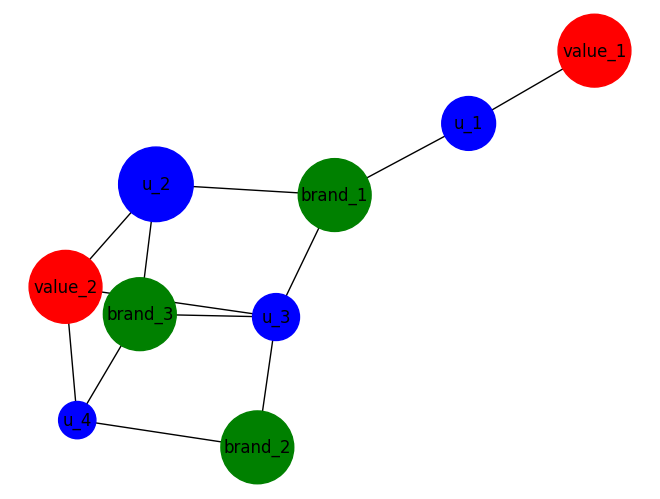

In [16]:
# Use Kamada-Kawai layout.
# Nodes are positioned in such a way that the geometric (Euclidean) distance between them is proportional to their graph-theoretic distance (shortest path distance).
pos = nx.kamada_kawai_layout(G_5)

# Draw plot
nx.draw(G_5, pos=pos, with_labels=True, node_size=node_sizes, node_color=node_colors)
plt.show()

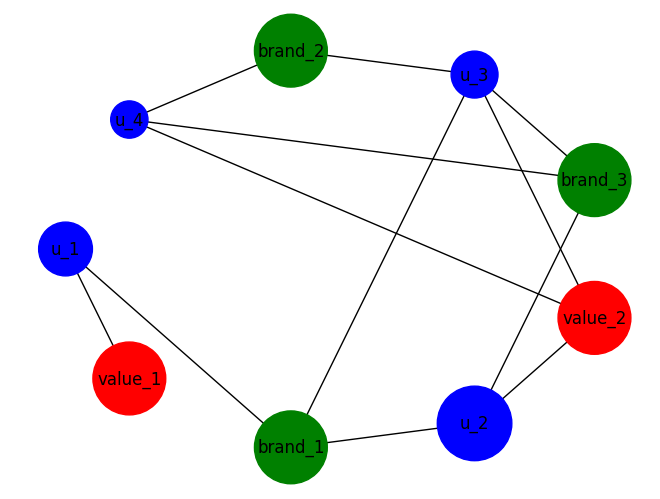

In [17]:
# Use shell_layout (nodes are positioned in concentric circles) 
pos = nx.shell_layout(G_5)

# Draw plot
nx.draw(G_5, pos=pos, with_labels=True, node_size=node_sizes, node_color=node_colors)
plt.show()

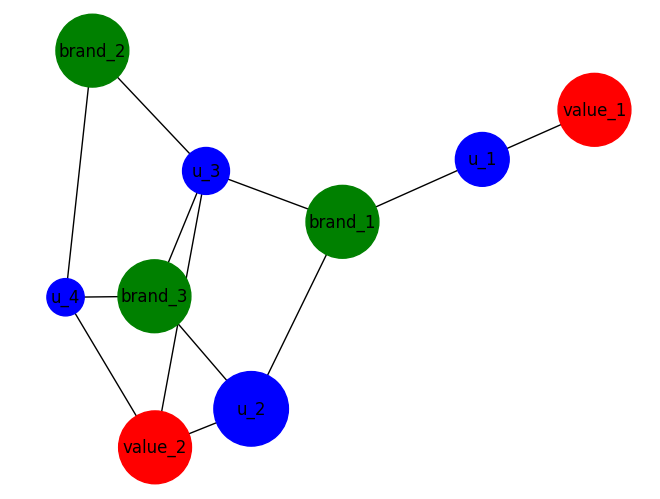

In [18]:
seed = 4
pos = nx.spring_layout(G_5, seed=seed)

# Draw plot
nx.draw(G_5, pos=pos, with_labels=True, node_size=node_sizes, node_color=node_colors)
plt.show()

## 6. Scenario 6:  Calculate "total_views_to_brand" and adjust brand node size accordingly

### 6.1 Adjust brand nodes size based on number of views

In [19]:
# Scenario 6 data
data_6 = {
    "user_id": ["u_1", "u_2", "u_3", "u_4"],
    "feature": ["value_1", "value_2", "value_2", "value_2"],
    "viewed_brand": [
        ["brand_1"], ["brand_1", "brand_3"], ["brand_1", "brand_2", "brand_3"], ["brand_2", "brand_3"]
    ],
    "views_count_by_brand": [
        {"brand_1": 25}, {"brand_1": 28, "brand_3": 20}, {"brand_1": 10,"brand_2": 3, "brand_3": 6}, {"brand_2": 4, "brand_3": 8}
    ],
    "total_views_of_user": [25, 48, 19, 12]
}

df_6 = pd.DataFrame(data_6)
df_6

,user_id,feature,viewed_brand,views_count_by_brand,total_views_of_user
0,u_1,value_1,[brand_1],{'brand_1': 25},25
1,u_2,value_2,"[brand_1, brand_3]","{'brand_1': 28, 'brand_3': 20}",48
2,u_3,value_2,"[brand_1, brand_2, brand_3]","{'brand_1': 10, 'brand_2': 3, 'brand_3': 6}",19
3,u_4,value_2,"[brand_2, brand_3]","{'brand_2': 4, 'brand_3': 8}",12


In [20]:
# Map user_id to total_views_of_user
total_views_of_user_dict = dict(zip(data_6["user_id"], data_6["total_views_of_user"]))
total_views_of_user_dict 

{'u_1': 25, 'u_2': 48, 'u_3': 19, 'u_4': 12}

In [21]:
# Add 3 columns to the dataframe and remove views_count_by_brand
# df_6 = df_6.join(pd.DataFrame(df_6.pop('views_count_by_brand').tolist()))

# Add 3 columns to the dataframe that show the views count of each brand for each user
df_6 = pd.concat([df_6, pd.DataFrame(df_6['views_count_by_brand'].tolist())], axis=1)
df_6

,user_id,feature,viewed_brand,views_count_by_brand,total_views_of_user,brand_1,brand_3,brand_2
0,u_1,value_1,[brand_1],{'brand_1': 25},25,25.0,NaN,NaN
1,u_2,value_2,"[brand_1, brand_3]","{'brand_1': 28, 'brand_3': 20}",48,28.0,20.0,NaN
2,u_3,value_2,"[brand_1, brand_2, brand_3]","{'brand_1': 10, 'brand_2': 3, 'brand_3': 6}",19,10.0,6.0,3.0
3,u_4,value_2,"[brand_2, brand_3]","{'brand_2': 4, 'brand_3': 8}",12,NaN,8.0,4.0


In [22]:
# Set brand columns to integers and fill NaN values with 0
df_6[["brand_1", "brand_2", "brand_3"]] = df_6[["brand_1", "brand_2", "brand_3"]].fillna(0).astype(int)
df_6

,user_id,feature,viewed_brand,views_count_by_brand,total_views_of_user,brand_1,brand_3,brand_2
0,u_1,value_1,[brand_1],{'brand_1': 25},25,25,0,0
1,u_2,value_2,"[brand_1, brand_3]","{'brand_1': 28, 'brand_3': 20}",48,28,20,0
2,u_3,value_2,"[brand_1, brand_2, brand_3]","{'brand_1': 10, 'brand_2': 3, 'brand_3': 6}",19,10,6,3
3,u_4,value_2,"[brand_2, brand_3]","{'brand_2': 4, 'brand_3': 8}",12,0,8,4


In [23]:
# add prefix "views_to_" to all brand columns
df_6 = df_6.rename(columns=lambda x: f"views_to_{x}" if x.startswith("brand") else x)
df_6

,user_id,feature,viewed_brand,views_count_by_brand,total_views_of_user,views_to_brand_1,views_to_brand_3,views_to_brand_2
0,u_1,value_1,[brand_1],{'brand_1': 25},25,25,0,0
1,u_2,value_2,"[brand_1, brand_3]","{'brand_1': 28, 'brand_3': 20}",48,28,20,0
2,u_3,value_2,"[brand_1, brand_2, brand_3]","{'brand_1': 10, 'brand_2': 3, 'brand_3': 6}",19,10,6,3
3,u_4,value_2,"[brand_2, brand_3]","{'brand_2': 4, 'brand_3': 8}",12,0,8,4


#### Until now, we refactored the "views_count_by_brand" column to 3 columns that show the views count of each brand for each user.   

In [24]:
# Calculate total views to each brand
total_views_to_brand = df_6[["views_to_brand_1", "views_to_brand_2", "views_to_brand_3"]].sum()
total_views_to_brand

views_to_brand_1    63
views_to_brand_2     7
views_to_brand_3    34
dtype: int64

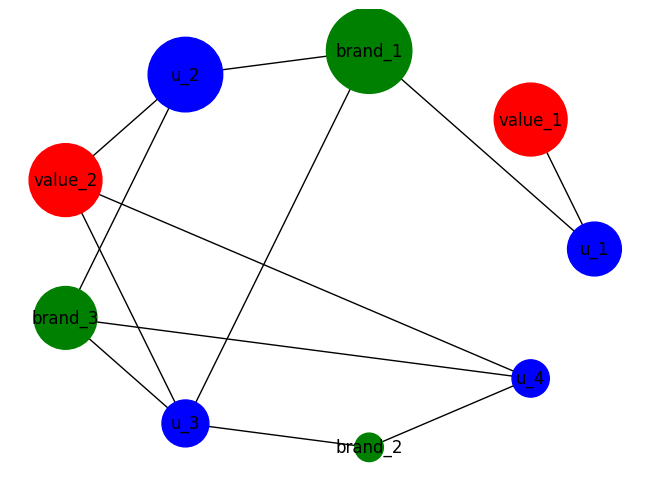

In [25]:
# Graph with adjusted brand node size
G_6 = nx.Graph()

for _, row in df_6.iterrows():
    for brand in row['viewed_brand']:
        G_6.add_edge(row['user_id'], row['feature'])
        G_6.add_edge(row['user_id'], brand)

# Assign colors
assign_color = lambda node: 'green' if node.startswith('brand') else (
    'red' if node.startswith('value') else 'blue'
)
node_colors = [assign_color(node) for node in G_6.nodes()]

# set layout
pos = nx.circular_layout(G_6)

# Calculate and map total views to each brand
total_views_to_brand = df_6[["views_to_brand_1", "views_to_brand_2", "views_to_brand_3"]].sum().to_dict()

# Map brands to total_views_to_brand
total_views_to_brand_dict = {f"brand_{i+1}": total_views_to_brand[f"views_to_brand_{i+1}"] for i in range(len(total_views_to_brand))}

# Map user_id to total_views_of_user
total_views_of_user_dict = dict(zip(data_6["user_id"], data_6["total_views_of_user"]))

# Generate node_sizes list
node_sizes = [
    total_views_of_user_dict[node] * 60 if node in total_views_of_user_dict else 
    total_views_to_brand_dict[node] * 60 if node in total_views_to_brand_dict else 
    2750 
    for node in G_6.nodes()
]

# Draw plot
nx.draw(G_6, pos=pos, with_labels=True, node_size=node_sizes, node_color=node_colors)
plt.show()

### 6.2. Set brand nodes shape to diamond

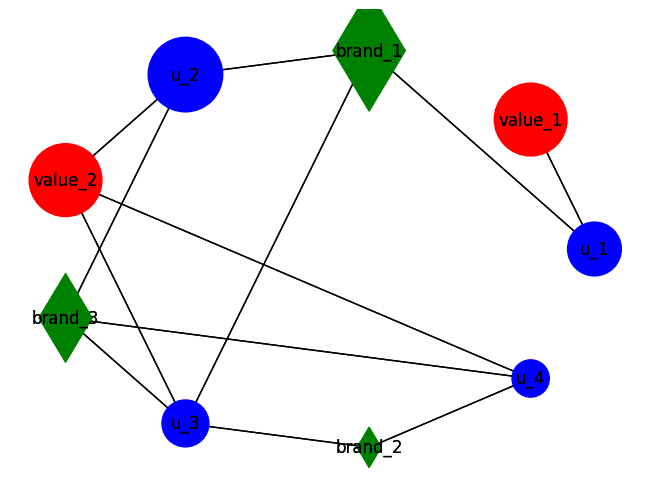

In [26]:
# set brand nodes shape as diamond
node_shapes = ['d' if node.startswith('brand') else 'o' for node in G_6.nodes()]

# Draw plot
for shape in set(node_shapes):
    nx.draw(
        G_6, pos=pos, with_labels=True, 
        node_size=[size for size, s in zip(node_sizes, node_shapes) if s == shape], 
        node_color=[color for color, s in zip(node_colors, node_shapes) if s == shape],
        nodelist=[node for node, s in zip(G_6.nodes(), node_shapes) if s == shape],
        node_shape=shape
    )
plt.show()

### 6.3. Adjust users to brands line thickness using weights for number of views to each brand by each user

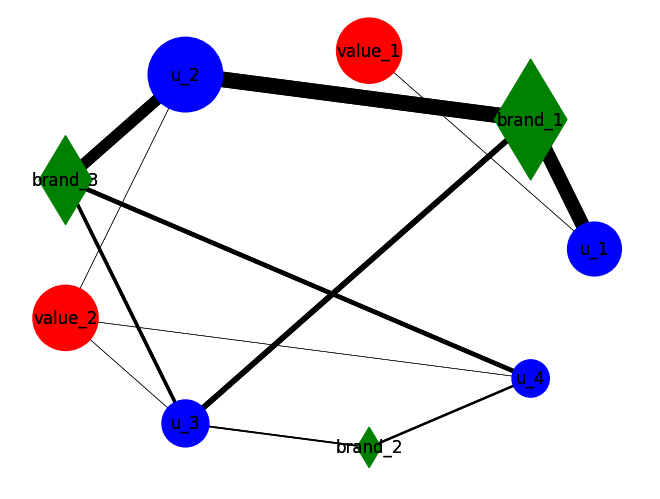

In [27]:
# List of edges with their corresponding weights (views count)
edges_with_weights = []
for _, row in df_6.iterrows():
    for brand in row['viewed_brand']:
        views = row['views_count_by_brand'][brand]
        edges_with_weights.append((row['user_id'], brand, views))
    edges_with_weights.append((row['user_id'], row['feature'], 1))  # Add feature edges with a default weight

# Add edges with weights to the graph
G_6 = nx.Graph()
for user, brand, weight in edges_with_weights:
    G_6.add_edge(user, brand, weight=weight/2.5)  # Decrease thickness for aesthetic reasons

# Set layout
pos = nx.circular_layout(G_6)

# Calculate total views to each brand
total_views_to_brand = df_6[["views_to_brand_1", "views_to_brand_2", "views_to_brand_3"]].sum().to_dict()

# Map brands to total_views_to_brand
total_views_to_brand_dict = {f"brand_{i+1}": total_views_to_brand[f"views_to_brand_{i+1}"] for i in range(len(total_views_to_brand))}

# Map user_id to total_views_of_user
total_views_of_user_dict = dict(zip(data_6["user_id"], data_6["total_views_of_user"]))

# Assign colors
assign_color = lambda node: 'green' if node.startswith('brand') else (
    'red' if node.startswith('value') else 'blue'
)
node_colors = [assign_color(node) for node in G_6.nodes()]

# Generate node_sizes list
node_sizes = [
    total_views_of_user_dict[node] * 60 if node in total_views_of_user_dict else
    total_views_to_brand_dict[node] * 60 if node in total_views_to_brand_dict else
    2200
    for node in G_6.nodes()
]

# Generate edge widths list
edge_widths = [G_6[u][v]['weight'] for u, v in G_6.edges()]

# set brand nodes shape as diamond
node_shapes = ['d' if node.startswith('brand') else 'o' for node in G_6.nodes()]

# Draw plot
for shape in set(node_shapes):
    nx.draw(
        G_6, pos=pos, with_labels=True, 
        node_size=[size for size, s in zip(node_sizes, node_shapes) if s == shape], 
        node_color=[color for color, s in zip(node_colors, node_shapes) if s == shape],
        nodelist=[node for node, s in zip(G_6.nodes(), node_shapes) if s == shape],
        node_shape=shape,
        width=edge_widths
    )
plt.show()

### 6.3. Position feature nodes to left bottom to improve readability 

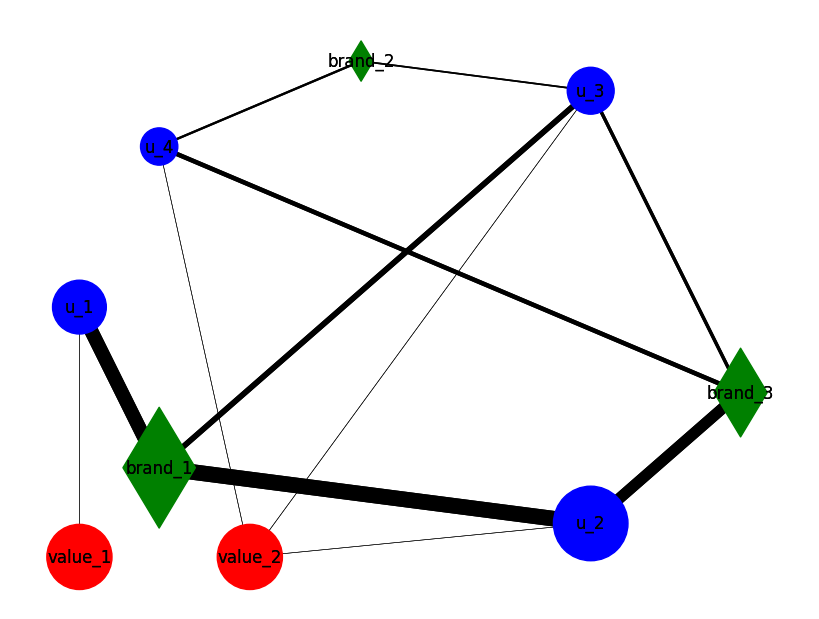

In [28]:
# Set layout
pos = nx.shell_layout(G_6)

# Adjust "value" nodes positions to bottom left corner
offset = 0.5
value_nodes = [node for node in G_6.nodes() if node.startswith('value')]
for i, node in enumerate(value_nodes):
    pos[node] = [-1 + i * offset, -1]

# Set figure size
plt.figure(figsize=(8, 6))  # width, height

# Draw plot
for shape in set(node_shapes):
    nx.draw(
        G_6, pos=pos, with_labels=True, 
        node_size=[size for size, s in zip(node_sizes, node_shapes) if s == shape], 
        node_color=[color for color, s in zip(node_colors, node_shapes) if s == shape],
        nodelist=[node for node, s in zip(G_6.nodes(), node_shapes) if s == shape],
        node_shape=shape,
        width=edge_widths
    )
plt.show()

## 7. Further reading

In [29]:
# available layout functions in networkx
layout_functions = [func for func in dir(nx) if 'layout' in func]
layout_functions

['arf_layout',
 'bfs_layout',
 'bipartite_layout',
 'circular_layout',
 'fruchterman_reingold_layout',
 'kamada_kawai_layout',
 'layout',
 'multipartite_layout',
 'planar_layout',
 'random_layout',
 'rescale_layout',
 'rescale_layout_dict',
 'shell_layout',
 'spectral_layout',
 'spiral_layout',
 'spring_layout']

In [30]:
# Networkx layout functions documentation
# help(nx.drawing.layout)

In [31]:
# help(nx.spring_layout)

### I hope you enjoyed this tutorial. Please reach out for comments and suggustions!
